<a href="https://colab.research.google.com/github/Rafiryd/Rafiryd/blob/rafiryd/skripsi28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proses Pengambilan data**

In [250]:
#Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/

!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [251]:
from google_play_scraper import app

import pandas as pd

import numpy as np

import seaborn as sns

In [252]:
#Scrape desired number of reviews
#Run kode ini jika ingin scrape data dengan jumlah tertentu. Ganti (misal, ingin scrape sejumlah 1000, maka ganti kode , count = 1000 )

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.bukalapak.android',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=1300, # defaults to 100
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

Problems slovlig tools = mencari akar permasalahan pada suatu masalah

5 why

metode mencari problems sloving dengan cara menanyakan apa penyebab permasalahaan muncul dan mencari jawabannya. hal ini di lakUkan berkali klai sampai permasalahan dapat tergambar dengan jelas

action priority 

diagram yang dapat di gunakan untuk mencari prioritas masalah berdasarkan impact atas benefit yang bisa diberikan dengan diagram ini kita memilih masalah yang impactnya mayoritas dari permasalahan yang ada.

fishbone digram 

digram yang dapat di gunakan untuk merinci masalah dan membantu mencari akar masalah yang dapat dilihat dari beberapa point of view

flowchart/algo

metode pemecahan masalah dengan cara memetakan flow atau membuat pseudo algoritma yang untuk menentukan masalah dan cara untuk mencari solusinya secara sistematis

# **Data diproleh**

In [253]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,f2e26548-83d2-4bcf-bac3-6dc9db1cb12d,Nizar Rayyan,https://play-lh.googleusercontent.com/a-/AD_cM...,Paylater ngk bener.. selalu di batalkan otomat...,1,352,5.31.3,2023-04-16 23:03:31,"Hai, mohon maaf atas ketidaknyamanannya. Jika ...",2020-03-06 11:44:30,5.31.3
1,08f05b3b-be88-43f2-a300-aaebf6585655,Ganjar Hermadi,https://play-lh.googleusercontent.com/a-/AD_cM...,Pengembalian dana otomatis ga berfungsi...sy l...,1,78,5.32.1,2023-05-27 23:42:34,None,NaT,5.32.1
2,5ef5f760-f72a-473b-9fb3-48e5556cefc6,Fandy Komo,https://play-lh.googleusercontent.com/a/AAcHTt...,Tambah kesini buka lapak tambah kurang bagus p...,1,204,5.31.3,2023-05-05 02:37:25,None,NaT,5.31.3
3,37b934e6-6cfe-4e2b-8a8b-fb8061f2c7fe,Dwi Indarti,https://play-lh.googleusercontent.com/a/AAcHTt...,"Setelah dibayar lunas,paylater tidak bisa dibu...",1,4,5.31.3,2023-06-06 04:19:17,None,NaT,5.31.3
4,17640730-6dcd-4836-9cd9-2e99a36d2be6,Yuda Nugraha,https://play-lh.googleusercontent.com/a-/AD_cM...,"Di update malah ngaco ini aplikasi, menu baran...",3,18,5.32.2,2023-05-31 10:59:36,None,NaT,5.32.2


In [254]:
len(df_busu.index) #count the number of data we got

1300

In [255]:
df_busu[['userName', 'score','at', 'content']].tail()  #preview userName, rating, date-time, and reviews only

,userName,score,at,content
1295,Pengguna Google,5,2019-12-22 07:50:08,Belanja tanpa ribet cukup transfer d gerai pun...
1296,KARMAD ZAIN,1,2020-11-14 10:02:19,Saya kecewa dengan aplikasi bukalapak yang sek...
1297,Pengguna Google,3,2018-10-18 11:20:35,"Saran untuk Bukalapak, kenapa transaksi di Buk..."
1298,Pengguna Google,1,2020-04-22 06:47:51,Setelah update terakhir tgl 17 April 20. Apl B...
1299,Mahmudi Muday,5,2020-12-12 07:46:16,Sejak tahun 2012 bersama bukalapak masih setia...


# **Perubahan Penamaan Pada Setiap Kolom**

In [256]:
name_dataframe = df_busu.loc[:,["userName", "score", "at", "content"]]
name_dataframe.rename(columns={"userName": "Nama pengguna", "score":"Rating", "at": "Date", "content": "Ulasan"}, inplace=True)

In [257]:
name_dataframe.tail()

,Nama pengguna,Rating,Date,Ulasan
1295,Pengguna Google,5,2019-12-22 07:50:08,Belanja tanpa ribet cukup transfer d gerai pun...
1296,KARMAD ZAIN,1,2020-11-14 10:02:19,Saya kecewa dengan aplikasi bukalapak yang sek...
1297,Pengguna Google,3,2018-10-18 11:20:35,"Saran untuk Bukalapak, kenapa transaksi di Buk..."
1298,Pengguna Google,1,2020-04-22 06:47:51,Setelah update terakhir tgl 17 April 20. Apl B...
1299,Mahmudi Muday,5,2020-12-12 07:46:16,Sejak tahun 2012 bersama bukalapak masih setia...


In [258]:
name_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Nama pengguna  1300 non-null   object        
 1   Rating         1300 non-null   int64         
 2   Date           1300 non-null   datetime64[ns]
 3   Ulasan         1300 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 40.8+ KB


In [259]:
import nltk

In [260]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [261]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].astype(str)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan
0,Nizar Rayyan,1,2023-04-16 23:03:31,Paylater ngk bener.. selalu di batalkan otomat...
1,Ganjar Hermadi,1,2023-05-27 23:42:34,Pengembalian dana otomatis ga berfungsi...sy l...
2,Fandy Komo,1,2023-05-05 02:37:25,Tambah kesini buka lapak tambah kurang bagus p...
3,Dwi Indarti,1,2023-06-06 04:19:17,"Setelah dibayar lunas,paylater tidak bisa dibu..."
4,Yuda Nugraha,3,2023-05-31 10:59:36,"Di update malah ngaco ini aplikasi, menu baran..."


# **Case folding**

In [262]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].str.lower()

# **cleansing**

In [263]:
import string 
import re 
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

def remove_links(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    return text.replace("http://", " ").replace("https://", " ")
                
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_links)

In [264]:
#menghapus number
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_number)

In [265]:
#menghapus punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_punctuation)

In [266]:
# menghapus single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_singl_char)

# **Tokenizing**

In [267]:
# Tokenisasi 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

name_dataframe['Ulasan_tokenize'] = name_dataframe['Ulasan'].apply(word_tokenize_wrapper)

In [268]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o..."
1,Ganjar Hermadi,1,2023-05-27 23:42:34,pengembalian dana otomatis ga berfungsisy lg b...,"[pengembalian, dana, otomatis, ga, berfungsisy..."
2,Fandy Komo,1,2023-05-05 02:37:25,tambah kesini buka lapak tambah kurang bagus p...,"[tambah, kesini, buka, lapak, tambah, kurang, ..."
3,Dwi Indarti,1,2023-06-06 04:19:17,setelah dibayar lunaspaylater tidak bisa dibua...,"[setelah, dibayar, lunaspaylater, tidak, bisa,..."
4,Yuda Nugraha,3,2023-05-31 10:59:36,di update malah ngaco ini aplikasi menu barang...,"[di, update, malah, ngaco, ini, aplikasi, menu..."
...,...,...,...,...,...
1295,Pengguna Google,5,2019-12-22 07:50:08,belanja tanpa ribet cukup transfer gerai pun...,"[belanja, tanpa, ribet, cukup, transfer, gerai..."
1296,KARMAD ZAIN,1,2020-11-14 10:02:19,saya kecewa dengan aplikasi bukalapak yang sek...,"[saya, kecewa, dengan, aplikasi, bukalapak, ya..."
1297,Pengguna Google,3,2018-10-18 11:20:35,saran untuk bukalapak kenapa transaksi di buka...,"[saran, untuk, bukalapak, kenapa, transaksi, d..."
1298,Pengguna Google,1,2020-04-22 06:47:51,setelah update terakhir tgl april apl bl j...,"[setelah, update, terakhir, tgl, april, apl, b..."


In [269]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize'], dtype='object')

In [270]:
#Run This Code to Sort the Data By Date 
# tanggal 26-04-2022 sampai 12-10-2022

new_df = name_dataframe[['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize']]
sorted_df = new_df.sort_values(by='Date', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
19,hard Cool,5,2023-06-10 01:55:42,ok terus pertahankan pelayanan yang baik dari ...,"[ok, terus, pertahankan, pelayanan, yang, baik..."
348,mangzenggot jenggot,5,2023-06-09 13:18:09,sangat membantu sekalimempermudah dalam pekerj...,"[sangat, membantu, sekalimempermudah, dalam, p..."
666,Aditya Safitri,5,2023-06-09 12:11:33,mantaaappp gan tapi sayang ga bsa ngajuin payl...,"[mantaaappp, gan, tapi, sayang, ga, bsa, ngaju..."
273,Kosasih Kos,5,2023-06-09 11:36:37,pengiriman barang cepat dan sesuai dg pesanan thx,"[pengiriman, barang, cepat, dan, sesuai, dg, p..."
22,Muhamad Satya Marutama,1,2023-06-09 10:24:41,okee ini pembelian terakhir saya di bukalapak ...,"[okee, ini, pembelian, terakhir, saya, di, buk..."


In [271]:
sorted_df.dtypes

Nama pengguna              object
Rating                      int64
Date               datetime64[ns]
Ulasan                     object
Ulasan_tokenize            object
dtype: object

In [272]:
import pandas as pd

# Assuming you have a DataFrame named ulasan with columns 'Ulasan_tokenize' and 'Ulasan_ears'

word_to_erase = 'nya'  # Replace 'word' with the word you want to erase

name_dataframe["ulasan_ears"] = name_dataframe['Ulasan_tokenize'].apply(lambda x: [word for word in x if word != word_to_erase])

print(name_dataframe)


        Nama pengguna  Rating                Date  \
0        Nizar Rayyan       1 2023-04-16 23:03:31   
1      Ganjar Hermadi       1 2023-05-27 23:42:34   
2          Fandy Komo       1 2023-05-05 02:37:25   
3         Dwi Indarti       1 2023-06-06 04:19:17   
4        Yuda Nugraha       3 2023-05-31 10:59:36   
...               ...     ...                 ...   
1295  Pengguna Google       5 2019-12-22 07:50:08   
1296      KARMAD ZAIN       1 2020-11-14 10:02:19   
1297  Pengguna Google       3 2018-10-18 11:20:35   
1298  Pengguna Google       1 2020-04-22 06:47:51   
1299    Mahmudi Muday       5 2020-12-12 07:46:16   

                                                 Ulasan  \
0     paylater ngk bener selalu di batalkan otomatis...   
1     pengembalian dana otomatis ga berfungsisy lg b...   
2     tambah kesini buka lapak tambah kurang bagus p...   
3     setelah dibayar lunaspaylater tidak bisa dibua...   
4     di update malah ngaco ini aplikasi menu barang...   
...      

In [273]:
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, ngk, bener, selalu, di, batalkan, o..."
1,Ganjar Hermadi,1,2023-05-27 23:42:34,pengembalian dana otomatis ga berfungsisy lg b...,"[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, ga, berfungsisy..."
2,Fandy Komo,1,2023-05-05 02:37:25,tambah kesini buka lapak tambah kurang bagus p...,"[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ..."
3,Dwi Indarti,1,2023-06-06 04:19:17,setelah dibayar lunaspaylater tidak bisa dibua...,"[setelah, dibayar, lunaspaylater, tidak, bisa,...","[setelah, dibayar, lunaspaylater, tidak, bisa,..."
4,Yuda Nugraha,3,2023-05-31 10:59:36,di update malah ngaco ini aplikasi menu barang...,"[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, ngaco, ini, aplikasi, menu..."


In [274]:
# Menghitung Distibusi Persebaran Kata
def freqDist_wrapper(text):
    return FreqDist(text)

Ulasan_fqsist = name_dataframe['ulasan_ears'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(Ulasan_fqsist.head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(tidak, 4), (di, 3), (kadang, 2), (gantian, 2...
1    [(ga, 3), (dana, 2), (tombol, 2), (pengembalia...
2    [(tambah, 3), (buka, 2), (susah, 2), (di, 2), ...
3    [(tidak, 2), (cs, 2), (agen, 2), (setelah, 1),...
4    [(di, 5), (barang, 3), (cari, 3), (malah, 2), ...
Name: ulasan_ears, dtype: object


In [275]:
print(name_dataframe.columns)

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize',
       'ulasan_ears'],
      dtype='object')


In [276]:
name_dataframe['Ulasan_tokenize'].unique

<bound method Series.unique of 0       [paylater, ngk, bener, selalu, di, batalkan, o...
1       [pengembalian, dana, otomatis, ga, berfungsisy...
2       [tambah, kesini, buka, lapak, tambah, kurang, ...
3       [setelah, dibayar, lunaspaylater, tidak, bisa,...
4       [di, update, malah, ngaco, ini, aplikasi, menu...
                              ...                        
1295    [belanja, tanpa, ribet, cukup, transfer, gerai...
1296    [saya, kecewa, dengan, aplikasi, bukalapak, ya...
1297    [saran, untuk, bukalapak, kenapa, transaksi, d...
1298    [setelah, update, terakhir, tgl, april, apl, b...
1299    [sejak, tahun, bersama, bukalapak, masih, seti...
Name: Ulasan_tokenize, Length: 1300, dtype: object>

In [277]:
slank_word_dict = {
    "berjalansudah" : "berjalan",
    "paraah" : "parah",
    "keduakali" : "",
    "keduakali" : "kedua kali",
    "agak" : "sedikit",
    "pas" : "saat",
    "produkx" : "produknya",
    "sukamkasih" : "suka makasih",
    "gak" : "tidak",
    "cpt" : "cepat",
    "sdh" : "sudah",
    "recommend" : "rekomendasi",
    "bagusseller" : "bagus",
    "bagusssss" : "bagus",
    "bagussssss" : "bagus",
    "baguuussss" : "bagus",
    "cepatmakasih": "cepat",
    "cepatmantappp": "cepat",
    "cepatproduct": "cepat",
    "cepatrecomended": "cepat",
    "cepattoko": "cepat",
    "recomended": "rekomendasi",
    "recommended": "rekomendasi",
    "rekomendasi": "rekomendasi",
    "rekomended": "rekomendasi",
    }

def slank_normalized_term(document):
    return [slank_word_dict[term] if term in slank_word_dict else term for term in document]

# **Normalization**

In [279]:
normalizad_word = pd.read_csv("/content/kamusindonesia.csv.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [280]:
name_dataframe['Ulasan_normalized'] = name_dataframe['Ulasan_tokenize'].apply(normalized_term).apply(slank_normalized_term)

In [281]:
name_dataframe.head(100)

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan..."
1,Ganjar Hermadi,1,2023-05-27 23:42:34,pengembalian dana otomatis ga berfungsisy lg b...,"[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, enggak, berfung..."
2,Fandy Komo,1,2023-05-05 02:37:25,tambah kesini buka lapak tambah kurang bagus p...,"[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ..."
3,Dwi Indarti,1,2023-06-06 04:19:17,setelah dibayar lunaspaylater tidak bisa dibua...,"[setelah, dibayar, lunaspaylater, tidak, bisa,...","[setelah, dibayar, lunaspaylater, tidak, bisa,...","[setelah, dibayar, lunaspaylater, tidak, bisa,..."
4,Yuda Nugraha,3,2023-05-31 10:59:36,di update malah ngaco ini aplikasi menu barang...,"[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, mengaco, ini, aplikasi, me..."
...,...,...,...,...,...,...,...
95,Kawaī monsutāかわいいモンスター（Ricks）,1,2023-04-11 15:45:35,apk gak jelas error terus sistem cod pun jadi ...,"[apk, gak, jelas, error, terus, sistem, cod, p...","[apk, gak, jelas, error, terus, sistem, cod, p...","[apk, enggak, jelas, error, terus, sistem, cod..."
96,Aris Gunawan,5,2023-05-04 23:26:15,aplikasi bukalapak sangat membantu untuk prose...,"[aplikasi, bukalapak, sangat, membantu, untuk,...","[aplikasi, bukalapak, sangat, membantu, untuk,...","[aplikasi, bukalapak, sangat, membantu, untuk,..."
97,Arif Zulkarnaen,1,2023-04-15 02:25:56,apk yg sulit untuk komplain jika ada kendala t...,"[apk, yg, sulit, untuk, komplain, jika, ada, k...","[apk, yg, sulit, untuk, komplain, jika, ada, k...","[apk, yang, sulit, untuk, komplain, jika, ada,..."
98,Abi Hafiz,1,2023-05-11 02:35:24,mengecewakan pesan barang sudah lebih bulan ...,"[mengecewakan, pesan, barang, sudah, lebih, bu...","[mengecewakan, pesan, barang, sudah, lebih, bu...","[mengecewakan, pesan, barang, sudah, lebih, bu..."


In [282]:
name_dataframe['Ulasan_normalized'].unique

<bound method Series.unique of 0       [paylater, enggak, benar, selalu, di, batalkan...
1       [pengembalian, dana, otomatis, enggak, berfung...
2       [tambah, kesini, buka, lapak, tambah, kurang, ...
3       [setelah, dibayar, lunaspaylater, tidak, bisa,...
4       [di, update, malah, mengaco, ini, aplikasi, me...
                              ...                        
1295    [belanja, tanpa, ribet, cukup, transfer, gerai...
1296    [saya, kecewa, dengan, aplikasi, bukalapak, ya...
1297    [saran, untuk, bukalapak, kenapa, transaksi, d...
1298    [setelah, update, terakhir, tanggal, april, ap...
1299    [sejak, tahun, bersama, bukalapak, masih, seti...
Name: Ulasan_normalized, Length: 1300, dtype: object>

# **Stop Removal**

In [283]:
from nltk.corpus import stopwords

In [284]:
list_stopwords = stopwords.words('indonesian')

In [285]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

name_dataframe['Ulasan_stop_removed'] = name_dataframe['Ulasan_normalized'].apply(stopwords_removal) 

In [286]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized,Ulasan_stop_removed
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan...","[paylater, batalkan, otomatis, kadang, nya, ga..."
1,Ganjar Hermadi,1,2023-05-27 23:42:34,pengembalian dana otomatis ga berfungsisy lg b...,"[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, enggak, berfung...","[pengembalian, dana, otomatis, berfungsisy, bu..."
2,Fandy Komo,1,2023-05-05 02:37:25,tambah kesini buka lapak tambah kurang bagus p...,"[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[kesini, buka, lapak, bagus, pelayanannya, kom..."
3,Dwi Indarti,1,2023-06-06 04:19:17,setelah dibayar lunaspaylater tidak bisa dibua...,"[setelah, dibayar, lunaspaylater, tidak, bisa,...","[setelah, dibayar, lunaspaylater, tidak, bisa,...","[setelah, dibayar, lunaspaylater, tidak, bisa,...","[dibayar, lunaspaylater, transaksi, apapunsela..."
4,Yuda Nugraha,3,2023-05-31 10:59:36,di update malah ngaco ini aplikasi menu barang...,"[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, mengaco, ini, aplikasi, me...","[update, mengaco, aplikasi, menu, barang, favo..."
...,...,...,...,...,...,...,...,...
1295,Pengguna Google,5,2019-12-22 07:50:08,belanja tanpa ribet cukup transfer gerai pun...,"[belanja, tanpa, ribet, cukup, transfer, gerai...","[belanja, tanpa, ribet, cukup, transfer, gerai...","[belanja, tanpa, ribet, cukup, transfer, gerai...","[belanja, ribet, transfer, gerai, enak, atm, m..."
1296,KARMAD ZAIN,1,2020-11-14 10:02:19,saya kecewa dengan aplikasi bukalapak yang sek...,"[saya, kecewa, dengan, aplikasi, bukalapak, ya...","[saya, kecewa, dengan, aplikasi, bukalapak, ya...","[saya, kecewa, dengan, aplikasi, bukalapak, ya...","[kecewa, aplikasi, bukalapak, fitur, zonk, spi..."
1297,Pengguna Google,3,2018-10-18 11:20:35,saran untuk bukalapak kenapa transaksi di buka...,"[saran, untuk, bukalapak, kenapa, transaksi, d...","[saran, untuk, bukalapak, kenapa, transaksi, d...","[saran, untuk, bukalapak, kenapa, transaksi, d...","[saran, bukalapak, transaksi, bukalapak, bayar..."
1298,Pengguna Google,1,2020-04-22 06:47:51,setelah update terakhir tgl april apl bl j...,"[setelah, update, terakhir, tgl, april, apl, b...","[setelah, update, terakhir, tgl, april, apl, b...","[setelah, update, terakhir, tanggal, april, ap...","[update, tanggal, april, apl, bl, berfungsi, t..."


In [287]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [288]:
pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Stemming**

In [289]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in name_dataframe['Ulasan_stop_removed']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

name_dataframe['Ulasan_Stemmed'] = name_dataframe['Ulasan_stop_removed'].swifter.apply(get_stemmed_term)

4539
------------------------
paylater : paylater
batalkan : batal
otomatis : otomatis
kadang : kadang
nya : nya
gantian : ganti
jatuh : jatuh
tempo : tempo
bayar : bayar
biaya : biaya
keterlambatan : lambat
layanan : layan
biar : biar
merasakan : rasa
rasakan : rasa
sistem : sistem
seenak : enak
chat : chat
susah : susah
error : error
menyalahkan : salah
bikin : bikin
pusing : pusing
pengembalian : kembali
dana : dana
berfungsisy : berfungsisy
butuh : butuh
banget : banget
dananya : dana
ajuin : ajuin
komplainada : komplainada
tombol : tombol
komplain : komplain
diarahin : diarahin
pusat : pusat
bantuan : bantu
pengajuan : aju
pembatalanpengembalian : pembatalanpengembalian
aplikasinya : aplikasi
payahmenyulitkan : payahmenyulitkan
konsumen : konsumen
kesini : kesini
buka : buka
lapak : lapak
bagus : bagus
pelayanannya : layan
komplan : komplan
beberapakali : beberapakali
transaksi : transaksi
rekening : rekening
deh : deh
kepotong : potong
lapaknya : lapak
terverifikasi : verifikasi


Pandas Apply:   0%|          | 0/1300 [00:00<?, ?it/s]

In [290]:
name_dataframe["Ulasan_siap"] = [' '.join(map(str, l)) for l in name_dataframe['Ulasan_Stemmed']]


In [291]:
name_dataframe.to_excel("tokped_text.xlsx")

In [292]:
ulasan = ' '.join(str(v) for v in name_dataframe['Ulasan_siap'])

In [293]:
tokenize_ulasan = word_tokenize(ulasan)

In [294]:
tokenize_ulasan

['paylater',
 'batal',
 'otomatis',
 'kadang',
 'nya',
 'ganti',
 'jatuh',
 'tempo',
 'bayar',
 'biaya',
 'lambat',
 'biaya',
 'layan',
 'biar',
 'rasa',
 'rasa',
 'sistem',
 'enak',
 'nya',
 'chat',
 'susah',
 'kadang',
 'error',
 'salah',
 'layan',
 'nya',
 'bikin',
 'pusing',
 'ganti',
 'pusing',
 'kembali',
 'dana',
 'otomatis',
 'berfungsisy',
 'butuh',
 'banget',
 'dana',
 'ajuin',
 'komplainada',
 'tombol',
 'komplain',
 'diarahin',
 'pusat',
 'bantu',
 'tombol',
 'aju',
 'pembatalanpengembalian',
 'dana',
 'aplikasi',
 'payahmenyulitkan',
 'konsumen',
 'kesini',
 'buka',
 'lapak',
 'bagus',
 'layan',
 'komplan',
 'susah',
 'susah',
 'banget',
 'beberapakali',
 'transaksi',
 'rekening',
 'deh',
 'potong',
 'buka',
 'lapak',
 'verifikasi',
 'kalo',
 'pengin',
 'komplain',
 'menu',
 'upload',
 'bukti',
 'bayar',
 'muncul',
 'kali',
 'kali',
 'hilang',
 'uang',
 'bayar',
 'gagal',
 'verifikasi',
 'bayar',
 'lunaspaylater',
 'transaksi',
 'apapunselalu',
 'batal',
 'otomatis',
 'har

In [295]:
fqdist = FreqDist(tokenize_ulasan)

In [296]:
fqdist

FreqDist({'bukalapak': 504, 'aplikasi': 483, 'barang': 429, 'nya': 419, 'pakai': 256, 'beli': 230, 'kirim': 229, 'belanja': 228, 'buka': 227, 'bayar': 215, ...})

In [297]:
# mencetak 15 kata paling banyak digunakan
fqdist.most_common(15)

[('bukalapak', 504),
 ('aplikasi', 483),
 ('barang', 429),
 ('nya', 419),
 ('pakai', 256),
 ('beli', 230),
 ('kirim', 229),
 ('belanja', 228),
 ('buka', 227),
 ('bayar', 215),
 ('lapak', 213),
 ('transaksi', 195),
 ('bantu', 163),
 ('jual', 158),
 ('bagus', 142)]

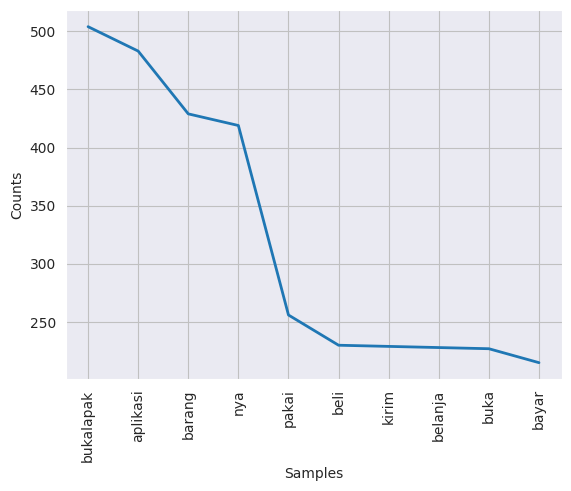

In [298]:
import matplotlib.pyplot as plt

# plotting
fqdist.plot(10,cumulative=False)
plt.show()

In [299]:
label = []
for index, row in name_dataframe.iterrows():
    if row["Rating"] == 5 or row["Rating"] == 4:
        label.append(1)
    else:
        label.append(0)

name_dataframe["label"] = label

name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_siap,label
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan...","[paylater, batalkan, otomatis, kadang, nya, ga...","[paylater, batal, otomatis, kadang, nya, ganti...",paylater batal otomatis kadang nya ganti jatuh...,0
1,Ganjar Hermadi,1,2023-05-27 23:42:34,pengembalian dana otomatis ga berfungsisy lg b...,"[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, enggak, berfung...","[pengembalian, dana, otomatis, berfungsisy, bu...","[kembali, dana, otomatis, berfungsisy, butuh, ...",kembali dana otomatis berfungsisy butuh banget...,0
2,Fandy Komo,1,2023-05-05 02:37:25,tambah kesini buka lapak tambah kurang bagus p...,"[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[kesini, buka, lapak, bagus, pelayanannya, kom...","[kesini, buka, lapak, bagus, layan, komplan, s...",kesini buka lapak bagus layan komplan susah su...,0
3,Dwi Indarti,1,2023-06-06 04:19:17,setelah dibayar lunaspaylater tidak bisa dibua...,"[setelah, dibayar, lunaspaylater, tidak, bisa,...","[setelah, dibayar, lunaspaylater, tidak, bisa,...","[setelah, dibayar, lunaspaylater, tidak, bisa,...","[dibayar, lunaspaylater, transaksi, apapunsela...","[bayar, lunaspaylater, transaksi, apapunselalu...",bayar lunaspaylater transaksi apapunselalu bat...,0
4,Yuda Nugraha,3,2023-05-31 10:59:36,di update malah ngaco ini aplikasi menu barang...,"[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, mengaco, ini, aplikasi, me...","[update, mengaco, aplikasi, menu, barang, favo...","[update, aco, aplikasi, menu, barang, favorit,...",update aco aplikasi menu barang favorit enggak...,0
...,...,...,...,...,...,...,...,...,...,...,...
1295,Pengguna Google,5,2019-12-22 07:50:08,belanja tanpa ribet cukup transfer gerai pun...,"[belanja, tanpa, ribet, cukup, transfer, gerai...","[belanja, tanpa, ribet, cukup, transfer, gerai...","[belanja, tanpa, ribet, cukup, transfer, gerai...","[belanja, ribet, transfer, gerai, enak, atm, m...","[belanja, ribet, transfer, gerai, enak, atm, m...",belanja ribet transfer gerai enak atm menu nya...,1
1296,KARMAD ZAIN,1,2020-11-14 10:02:19,saya kecewa dengan aplikasi bukalapak yang sek...,"[saya, kecewa, dengan, aplikasi, bukalapak, ya...","[saya, kecewa, dengan, aplikasi, bukalapak, ya...","[saya, kecewa, dengan, aplikasi, bukalapak, ya...","[kecewa, aplikasi, bukalapak, fitur, zonk, spi...","[kecewa, aplikasi, bukalapak, fitur, zonk, spi...",kecewa aplikasi bukalapak fitur zonk spin top ...,0
1297,Pengguna Google,3,2018-10-18 11:20:35,saran untuk bukalapak kenapa transaksi di buka...,"[saran, untuk, bukalapak, kenapa, transaksi, d...","[saran, untuk, bukalapak, kenapa, transaksi, d...","[saran, untuk, bukalapak, kenapa, transaksi, d...","[saran, bukalapak, transaksi, bukalapak, bayar...","[saran, bukalapak, transaksi, bukalapak, bayar...",saran bukalapak transaksi bukalapak bayar paka...,0
1298,Pengguna Google,1,2020-04-22 06:47:51,setelah update terakhir tgl april apl bl j...,"[setelah, update, terakhir, tgl, april, apl, b...","[setelah, update, terakhir, tgl, april, apl, b...","[setelah, update, terakhir, tanggal, april, ap...","[update, tanggal, april, apl, bl, berfungsi, t...","[update, tanggal, april, apl, bl, fungsi, tamp...",update tanggal april apl bl fungsi tampil menu...,0


In [300]:
#create a user define function to find out polarity & subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#creating another user define function to label the sentiment 

def getSentiment(value):
    if value < 0:
        return 'Negative'
    elif value > 0:
        return 'Positive'
    else:
        return 'Neutral'


In [301]:
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_siap,label
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan...","[paylater, batalkan, otomatis, kadang, nya, ga...","[paylater, batal, otomatis, kadang, nya, ganti...",paylater batal otomatis kadang nya ganti jatuh...,0
1,Ganjar Hermadi,1,2023-05-27 23:42:34,pengembalian dana otomatis ga berfungsisy lg b...,"[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, enggak, berfung...","[pengembalian, dana, otomatis, berfungsisy, bu...","[kembali, dana, otomatis, berfungsisy, butuh, ...",kembali dana otomatis berfungsisy butuh banget...,0
2,Fandy Komo,1,2023-05-05 02:37:25,tambah kesini buka lapak tambah kurang bagus p...,"[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[kesini, buka, lapak, bagus, pelayanannya, kom...","[kesini, buka, lapak, bagus, layan, komplan, s...",kesini buka lapak bagus layan komplan susah su...,0
3,Dwi Indarti,1,2023-06-06 04:19:17,setelah dibayar lunaspaylater tidak bisa dibua...,"[setelah, dibayar, lunaspaylater, tidak, bisa,...","[setelah, dibayar, lunaspaylater, tidak, bisa,...","[setelah, dibayar, lunaspaylater, tidak, bisa,...","[dibayar, lunaspaylater, transaksi, apapunsela...","[bayar, lunaspaylater, transaksi, apapunselalu...",bayar lunaspaylater transaksi apapunselalu bat...,0
4,Yuda Nugraha,3,2023-05-31 10:59:36,di update malah ngaco ini aplikasi menu barang...,"[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, mengaco, ini, aplikasi, me...","[update, mengaco, aplikasi, menu, barang, favo...","[update, aco, aplikasi, menu, barang, favorit,...",update aco aplikasi menu barang favorit enggak...,0


In [302]:
from textblob import TextBlob


In [303]:
def run_vader(name_dataframe):
    # Generate VADER sentiment analyzer object
    sid = SentimentIntensityAnalyzer()

In [304]:
name_dataframe['Polarity']=name_dataframe['Ulasan_siap'].apply(getPolarity)
name_dataframe['Subjectivity']=name_dataframe['Ulasan_siap'].apply(getSubjectivity)
name_dataframe['Sentiment']=name_dataframe['Polarity'].apply(getSentiment)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_siap,label,Polarity,Subjectivity,Sentiment
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan...","[paylater, batalkan, otomatis, kadang, nya, ga...","[paylater, batal, otomatis, kadang, nya, ganti...",paylater batal otomatis kadang nya ganti jatuh...,0,0.0,0.0,Neutral
1,Ganjar Hermadi,1,2023-05-27 23:42:34,pengembalian dana otomatis ga berfungsisy lg b...,"[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, enggak, berfung...","[pengembalian, dana, otomatis, berfungsisy, bu...","[kembali, dana, otomatis, berfungsisy, butuh, ...",kembali dana otomatis berfungsisy butuh banget...,0,0.0,0.0,Neutral
2,Fandy Komo,1,2023-05-05 02:37:25,tambah kesini buka lapak tambah kurang bagus p...,"[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[kesini, buka, lapak, bagus, pelayanannya, kom...","[kesini, buka, lapak, bagus, layan, komplan, s...",kesini buka lapak bagus layan komplan susah su...,0,0.0,0.0,Neutral
3,Dwi Indarti,1,2023-06-06 04:19:17,setelah dibayar lunaspaylater tidak bisa dibua...,"[setelah, dibayar, lunaspaylater, tidak, bisa,...","[setelah, dibayar, lunaspaylater, tidak, bisa,...","[setelah, dibayar, lunaspaylater, tidak, bisa,...","[dibayar, lunaspaylater, transaksi, apapunsela...","[bayar, lunaspaylater, transaksi, apapunselalu...",bayar lunaspaylater transaksi apapunselalu bat...,0,0.0,0.0,Neutral
4,Yuda Nugraha,3,2023-05-31 10:59:36,di update malah ngaco ini aplikasi menu barang...,"[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, mengaco, ini, aplikasi, me...","[update, mengaco, aplikasi, menu, barang, favo...","[update, aco, aplikasi, menu, barang, favorit,...",update aco aplikasi menu barang favorit enggak...,0,0.0,0.0,Neutral


In [305]:
name_dataframe['month'] = name_dataframe['Date'].dt.month

In [306]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_siap,label,Polarity,Subjectivity,Sentiment,month
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan...","[paylater, batalkan, otomatis, kadang, nya, ga...","[paylater, batal, otomatis, kadang, nya, ganti...",paylater batal otomatis kadang nya ganti jatuh...,0,0.0,0.0,Neutral,4
1,Ganjar Hermadi,1,2023-05-27 23:42:34,pengembalian dana otomatis ga berfungsisy lg b...,"[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, enggak, berfung...","[pengembalian, dana, otomatis, berfungsisy, bu...","[kembali, dana, otomatis, berfungsisy, butuh, ...",kembali dana otomatis berfungsisy butuh banget...,0,0.0,0.0,Neutral,5
2,Fandy Komo,1,2023-05-05 02:37:25,tambah kesini buka lapak tambah kurang bagus p...,"[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[kesini, buka, lapak, bagus, pelayanannya, kom...","[kesini, buka, lapak, bagus, layan, komplan, s...",kesini buka lapak bagus layan komplan susah su...,0,0.0,0.0,Neutral,5
3,Dwi Indarti,1,2023-06-06 04:19:17,setelah dibayar lunaspaylater tidak bisa dibua...,"[setelah, dibayar, lunaspaylater, tidak, bisa,...","[setelah, dibayar, lunaspaylater, tidak, bisa,...","[setelah, dibayar, lunaspaylater, tidak, bisa,...","[dibayar, lunaspaylater, transaksi, apapunsela...","[bayar, lunaspaylater, transaksi, apapunselalu...",bayar lunaspaylater transaksi apapunselalu bat...,0,0.0,0.0,Neutral,6
4,Yuda Nugraha,3,2023-05-31 10:59:36,di update malah ngaco ini aplikasi menu barang...,"[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, mengaco, ini, aplikasi, me...","[update, mengaco, aplikasi, menu, barang, favo...","[update, aco, aplikasi, menu, barang, favorit,...",update aco aplikasi menu barang favorit enggak...,0,0.0,0.0,Neutral,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Pengguna Google,5,2019-12-22 07:50:08,belanja tanpa ribet cukup transfer gerai pun...,"[belanja, tanpa, ribet, cukup, transfer, gerai...","[belanja, tanpa, ribet, cukup, transfer, gerai...","[belanja, tanpa, ribet, cukup, transfer, gerai...","[belanja, ribet, transfer, gerai, enak, atm, m...","[belanja, ribet, transfer, gerai, enak, atm, m...",belanja ribet transfer gerai enak atm menu nya...,1,0.0,0.0,Neutral,12
1296,KARMAD ZAIN,1,2020-11-14 10:02:19,saya kecewa dengan aplikasi bukalapak yang sek...,"[saya, kecewa, dengan, aplikasi, bukalapak, ya...","[saya, kecewa, dengan, aplikasi, bukalapak, ya...","[saya, kecewa, dengan, aplikasi, bukalapak, ya...","[kecewa, aplikasi, bukalapak, fitur, zonk, spi...","[kecewa, aplikasi, bukalapak, fitur, zonk, spi...",kecewa aplikasi bukalapak fitur zonk spin top ...,0,0.5,0.5,Positive,11
1297,Pengguna Google,3,2018-10-18 11:20:35,saran untuk bukalapak kenapa transaksi di buka...,"[saran, untuk, bukalapak, kenapa, transaksi, d...","[saran, untuk, bukalapak, kenapa, transaksi, d...","[saran, untuk, bukalapak, kenapa, transaksi, d...","[saran, bukalapak, transaksi, bukalapak, bayar...","[saran, bukalapak, transaksi, bukalapak, bayar...",saran bukalapak transaksi bukalapak bayar paka...,0,0.0,0.0,Neutral,10
1298,Pengguna Google,1,2020-04-22 06:47:51,setelah update terakhir tgl april apl bl j...,"[setelah, update, terakhir, tgl, april, apl, b...","[setelah, update, terakhir, tgl, april, apl, b...","[setelah, update, terakhir, tanggal, april, ap...","[update, tanggal, april, apl, bl, berfungsi, t...","[update, tanggal, april, apl, bl, fungsi, tamp...",update tanggal april apl bl fungsi tampil menu...,0,0.0,0.0,Neutr

In [307]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

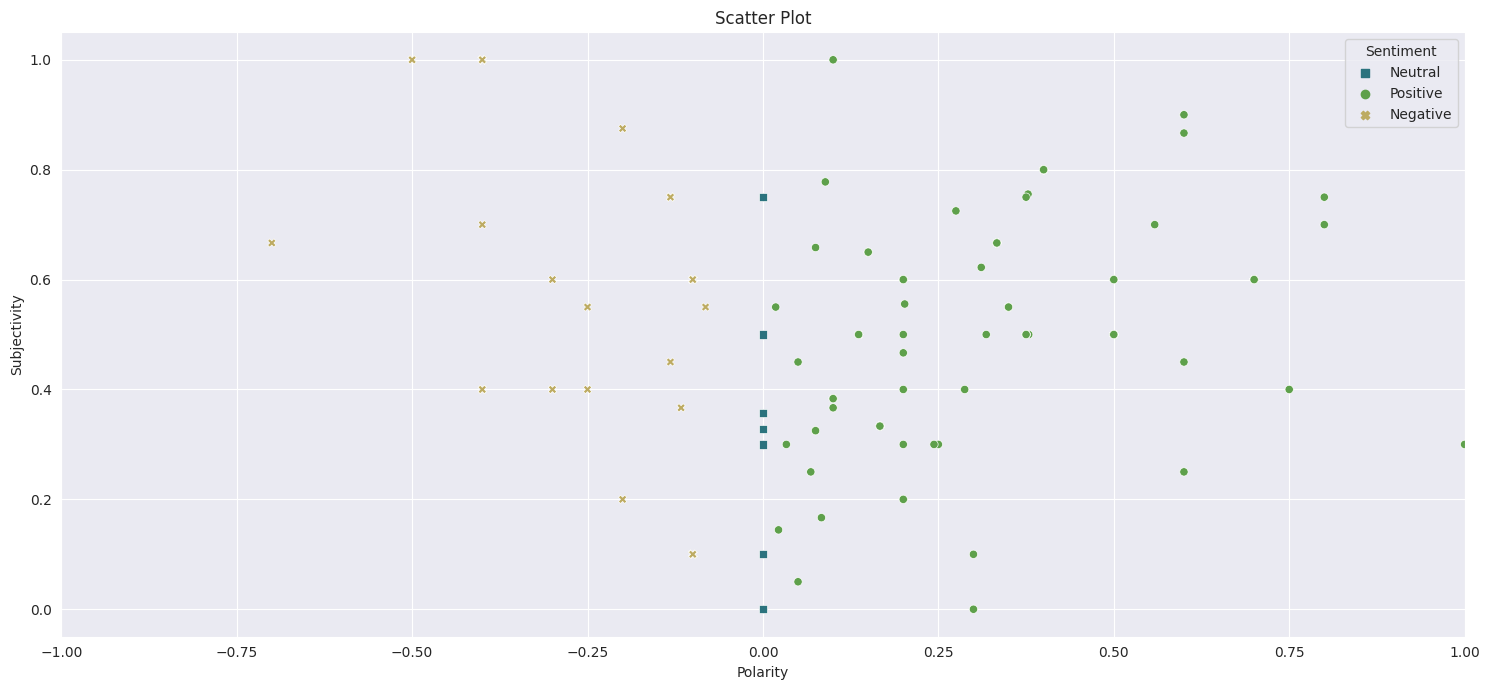

In [308]:
# Create scatter plot
sns.set_style('darkgrid')
plt.figure(figsize = (15,7))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

sns.scatterplot(data=name_dataframe, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

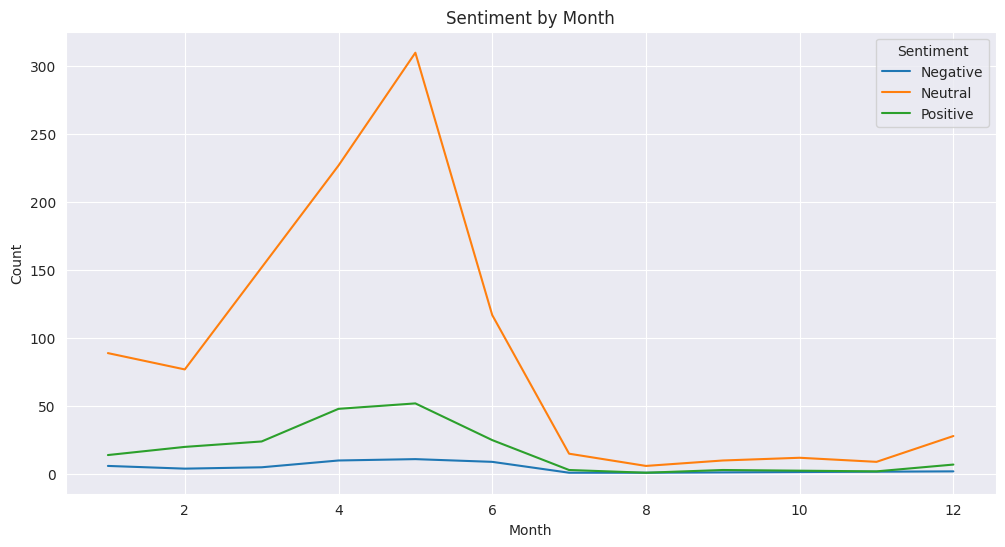

In [309]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by month and sentiment
sentiment_df = name_dataframe.groupby(['month', 'Sentiment']).size().reset_index(name='Count')


# Plot the sentiment counts by month
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='Count', hue='Sentiment', data=sentiment_df)
plt.title('Sentiment by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

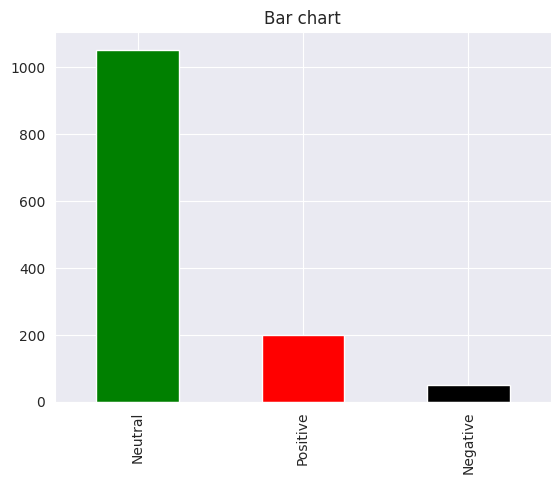

In [310]:
sentimen_data=pd.value_counts(name_dataframe["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red", "black"])
plt.title('Bar chart')
plt.show()

In [311]:
name_dataframe["Sentiment"].value_counts()

Neutral     1052
Positive     199
Negative      49
Name: Sentiment, dtype: int64

In [312]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [313]:
Ulasan = name_dataframe['Ulasan_siap']

In [314]:
Ulasan.isnull().sum()

0

In [315]:
#untuk menghitung jumlah kata yang telah di steming
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

3664


In [316]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutab abjad kata 

{'paylater': 2443,
 'batal': 302,
 'otomatis': 2378,
 'kadang': 1461,
 'nya': 2283,
 'ganti': 1137,
 'jatuh': 1396,
 'tempo': 3292,
 'bayar': 310,
 'biaya': 441,
 'lambat': 1780,
 'layan': 1817,
 'biar': 437,
 'rasa': 2704,
 'sistem': 3090,
 'enak': 1024,
 'chat': 703,
 'susah': 3194,
 'error': 1038,
 'salah': 2841,
 'bikin': 448,
 'pusing': 2684,
 'kembali': 1547,
 'dana': 791,
 'berfungsisy': 391,
 'butuh': 627,
 'banget': 259,
 'ajuin': 59,
 'komplainada': 1648,
 'tombol': 3414,
 'komplain': 1647,
 'diarahin': 859,
 'pusat': 2681,
 'bantu': 270,
 'aju': 58,
 'pembatalanpengembalian': 2486,
 'aplikasi': 166,
 'payahmenyulitkan': 2441,
 'konsumen': 1671,
 'kesini': 1584,
 'buka': 550,
 'lapak': 1794,
 'bagus': 221,
 'komplan': 1650,
 'beberapakali': 319,
 'transaksi': 3433,
 'rekening': 2739,
 'deh': 823,
 'potong': 2620,
 'verifikasi': 3564,
 'kalo': 1478,
 'pengin': 2516,
 'menu': 2075,
 'upload': 3536,
 'bukti': 609,
 'muncul': 2157,
 'kali': 1474,
 'hilang': 1265,
 'uang': 3491,
 

In [317]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

  (0, 302)	1
  (0, 310)	1
  (0, 437)	1
  (0, 441)	2
  (0, 448)	1
  (0, 703)	1
  (0, 1024)	1
  (0, 1038)	1
  (0, 1137)	2
  (0, 1396)	1
  (0, 1461)	2
  (0, 1780)	1
  (0, 1817)	2
  (0, 2283)	3
  (0, 2378)	1
  (0, 2443)	1
  (0, 2684)	2
  (0, 2704)	2
  (0, 2841)	1
  (0, 3090)	1
  (0, 3194)	1
  (0, 3292)	1
  (1, 58)	1
  (1, 59)	1
  (1, 166)	1
  :	:
  (1299, 1030)	1
  (1299, 1136)	1
  (1299, 1192)	1
  (1299, 1222)	1
  (1299, 1297)	1
  (1299, 1466)	1
  (1299, 1498)	1
  (1299, 1749)	1
  (1299, 2134)	1
  (1299, 2157)	1
  (1299, 2294)	1
  (1299, 2351)	1
  (1299, 2413)	1
  (1299, 2465)	1
  (1299, 2653)	2
  (1299, 2685)	1
  (1299, 2808)	1
  (1299, 3029)	1
  (1299, 3040)	1
  (1299, 3192)	1
  (1299, 3286)	1
  (1299, 3293)	1
  (1299, 3315)	1
  (1299, 3374)	1
  (1299, 3526)	1


In [318]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

kembali dana otomatis berfungsisy butuh banget dana ajuin komplainada tombol komplain diarahin pusat bantu tombol aju pembatalanpengembalian dana aplikasi payahmenyulitkan konsumen


In [319]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 58)	1
  (0, 59)	1
  (0, 166)	1
  (0, 259)	1
  (0, 270)	1
  (0, 391)	1
  (0, 627)	1
  (0, 791)	3
  (0, 859)	1
  (0, 1547)	1
  (0, 1647)	1
  (0, 1648)	1
  (0, 1671)	1
  (0, 2378)	1
  (0, 2441)	1
  (0, 2486)	1
  (0, 2681)	1
  (0, 3414)	2


In [320]:
dokumen = term_fit.transform(Ulasan) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) #hasil manual dengan sistem pyhton

[7.4777413  6.78459412 7.07227619 ... 6.78459412 7.4777413  7.4777413 ]
  (0, 3414)	0.4576830384742293
  (0, 2681)	0.21244935968635922
  (0, 2486)	0.26079868496339587
  (0, 2441)	0.26079868496339587
  (0, 2378)	0.14923963130726123
  (0, 1671)	0.17716809266181582
  (0, 1648)	0.26079868496339587
  (0, 1647)	0.12103626429701629
  (0, 1547)	0.15461589306643309
  (0, 859)	0.26079868496339587
  (0, 791)	0.39512883781010694
  (0, 627)	0.16635092284896
  (0, 391)	0.26079868496339587
  (0, 270)	0.11140146757557208
  (0, 259)	0.12040783890051442
  (0, 166)	0.07939622924911782
  (0, 59)	0.26079868496339587
  (0, 58)	0.1675332959403716


In [321]:
data_label = name_dataframe[["Nama pengguna", "Ulasan_siap", "Sentiment"]]

In [322]:
data_label["Ulasan_siap"] = data_label["Ulasan_siap"].fillna("tidak ada komentar")

<ipython-input-322-63aa05b24bd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label["Ulasan_siap"] = data_label["Ulasan_siap"].fillna("tidak ada komentar")


In [323]:
data_label.to_excel("data_label.xlsx")

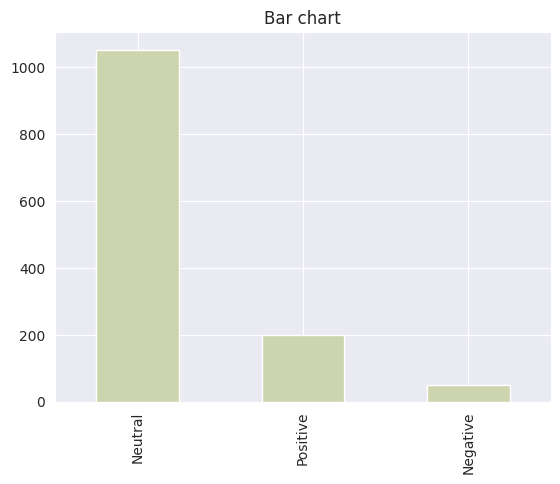

In [324]:
sentimen_data=pd.value_counts(data_label["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["#ccd5ae"])
plt.title('Bar chart')
plt.show()

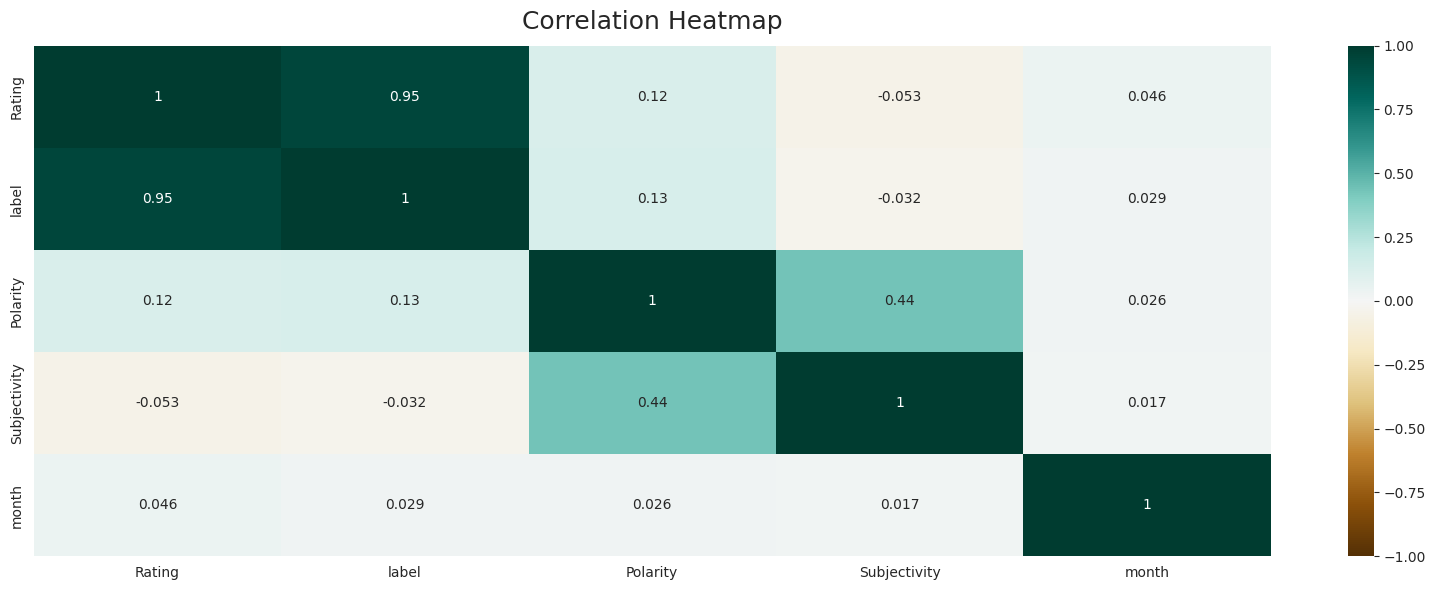

In [325]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(name_dataframe.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.tight_layout()

In [326]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize',
       'ulasan_ears', 'Ulasan_normalized', 'Ulasan_stop_removed',
       'Ulasan_Stemmed', 'Ulasan_siap', 'label', 'Polarity', 'Subjectivity',
       'Sentiment', 'month'],
      dtype='object')

In [327]:
train_s3 = data_label[data_label["Sentiment"] == 'Neutral']

In [328]:
train_s3["Ulasan_siap"] = train_s3["Ulasan_siap"].fillna("tidak ada komentar")

<ipython-input-328-4fc6d4cc0ecf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s3["Ulasan_siap"] = train_s3["Ulasan_siap"].fillna("tidak ada komentar")


Neutral words


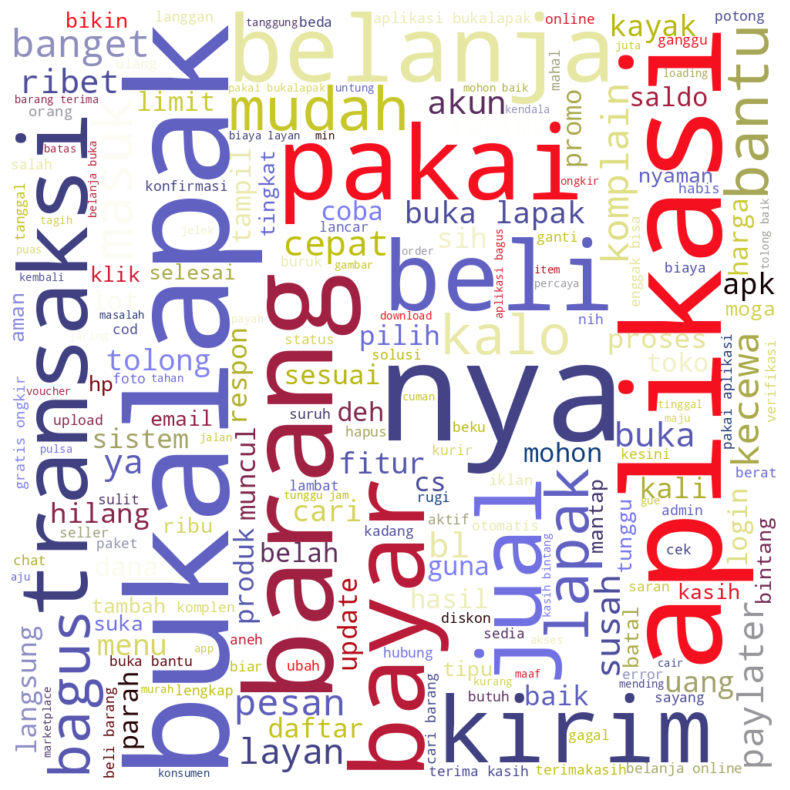

In [329]:
all_text_s0 = ' '.join(word for word in train_s3["Ulasan_siap"])
wordcloud = WordCloud(colormap='gist_stern', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
print("Neutral words")
plt.show()

In [330]:
from wordcloud import WordCloud

In [331]:
train_s0 = data_label[data_label["Sentiment"] == 'Negative']

In [332]:
train_s0["Ulasan_siap"] = train_s0["Ulasan_siap"].fillna("tidak ada komentar")

<ipython-input-332-dc46e426e77c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["Ulasan_siap"] = train_s0["Ulasan_siap"].fillna("tidak ada komentar")


In [333]:
train_s0

,Nama pengguna,Ulasan_siap,Sentiment
50,Ilham Padka Wijaya,bukalapak marketplace nya sellerseller tipu ka...,Negative
66,imam maliki,hati hubung akun aplkasi iniakun kena hack tra...,Negative
73,Afifur Rohman,aplikasi bagus minus ongkir mahal voucher paka...,Negative
84,Kaloka Galih Kayu Wangi,jual emas bukaemas susah banget banget problem...,Negative
85,Bam Hendrian,kesini sistem nya berat ajabanyak sisrem gunab...,Negative
150,eH boy,developer bukalapak lihat aplikasi shopee laza...,Negative
172,haidar dabi kataro,proses konfirmasi nya lamaproses kirim nya lam...,Negative
185,hidayat mudaris,tolong rumit verifikasi akun saldo bukalapak p...,Negative
187,Infinik smart6 Infinik smart6,bintang deh gagal pinjem alas pinjam tunai akt...,Negative
220,Nursamsi,mantap paylater limit paylaternya ditambahin c...,Negative


Negatif words


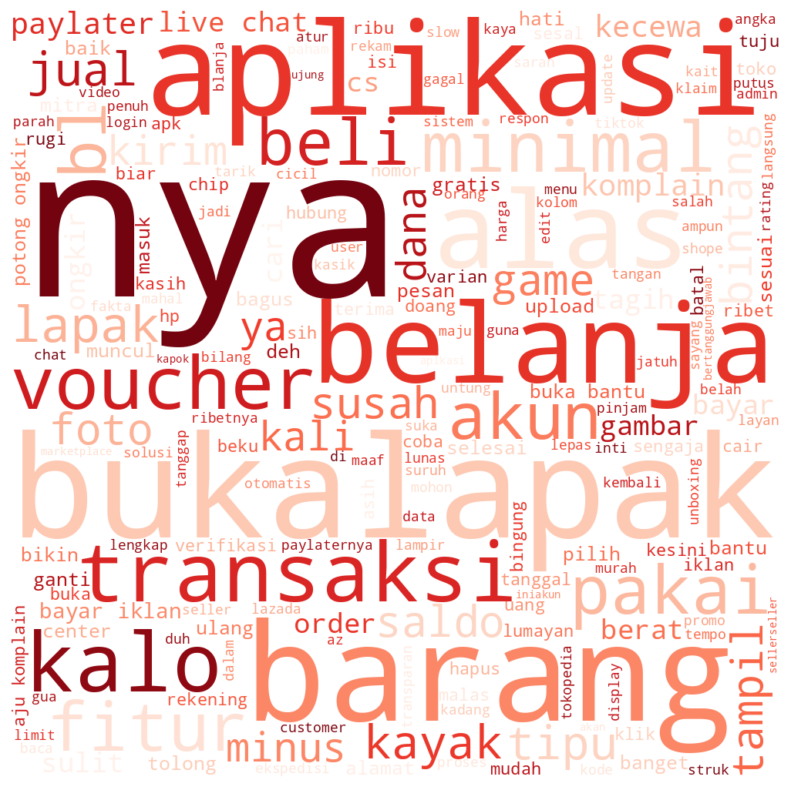

In [334]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan_siap"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
print("Negatif words")
plt.show()

In [335]:
train_s1 = data_label[data_label["Sentiment"] == 'Positive']

In [336]:
train_s1["Ulasan_siap"] = train_s1["Ulasan_siap"].fillna("tidak ada komentar")

<ipython-input-336-d1952b0b5859>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["Ulasan_siap"] = train_s1["Ulasan_siap"].fillna("tidak ada komentar")


In [337]:
train_s1

,Nama pengguna,Ulasan_siap,Sentiment
6,Sultan Get,systemnya kalo layan tutup aplikasi langgan ke...,Positive
16,Triadhi Purna,batal pesan susah ya jual bilang ready stok ha...,Positive
17,Servis Tv CIPANAS CIANJUR,aplikasi parah trnsaksi pulsa berhasilpulsa ma...,Positive
19,hard Cool,ok tahan layan bl lapak kurir pakai bl pesan s...,Positive
20,Holil Ludin,salah commerce pakai worth halaman transaksi k...,Positive
...,...,...,...
1275,Lha Maulhana,kacau biaya tangan paylater banget komplain li...,Positive
1289,chen chen liyen,alami kendala belanja live chat jalan sekalipa...,Positive
1292,BIO TEKNO SELARAS,batal pesan sulit komplain live chat hubung ny...,Positive
1294,Pengguna Google,commerce nilai super nego pakai harga segitu t...,Positive


Positif words


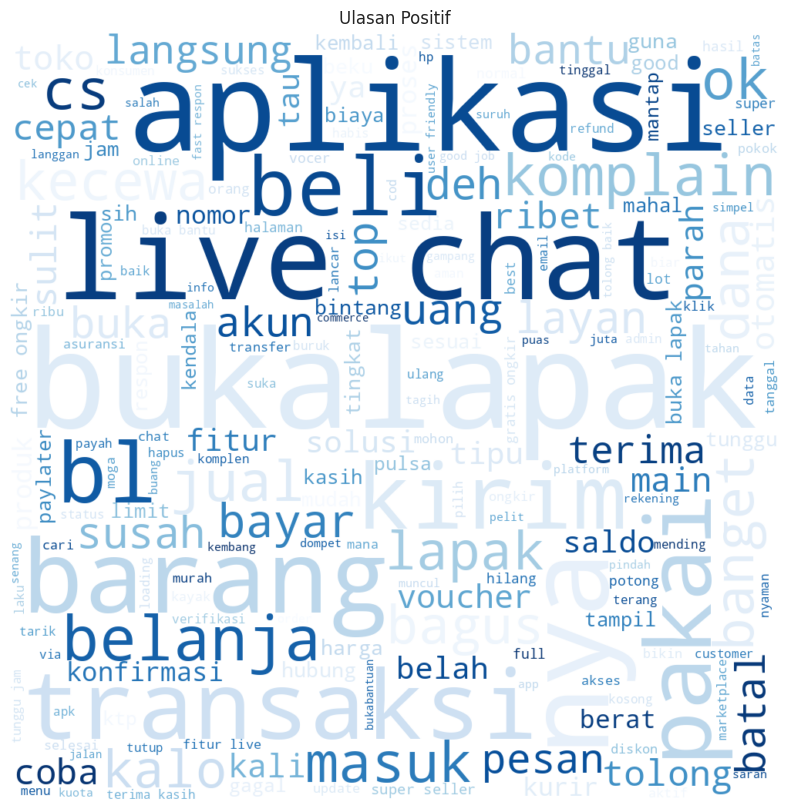

In [338]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan_siap"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
print("Positif words")
plt.show()

In [339]:
data_label['Ulasan_clean'] = data_label['Ulasan_siap'].fillna("tidak ada komentar")

<ipython-input-339-2ed151e306fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['Ulasan_clean'] = data_label['Ulasan_siap'].fillna("tidak ada komentar")


In [340]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_siap'], data_label['Sentiment'], 
                                                    test_size=0.1, stratify=data_label['Sentiment'], random_state=30)

In [341]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [342]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_label['Ulasan_siap'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data_label['Sentiment'], test_size=0.2, random_state=42)

# Train the Gaussian Naive Bayes classifier on the training set
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)

# Evaluate the classifier on the testing set
accuracy = gnb.score(X_test.toarray(), y_test)
print('Accuracy:', accuracy)

# Use the classifier to predict the sentiment class for all reviews in the dataset
data_label['predicted_sentiment_class'] = gnb.predict(X.toarray())

# Save the resulting dataframe to a new CSV file
data_label.to_csv('predicted_sentiment1.csv', index=False)

Accuracy: 0.5807692307692308


<ipython-input-342-92ba9d9b7c38>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['predicted_sentiment_class'] = gnb.predict(X.toarray())


In [343]:
import numpy as np

X_train = X_train.toarray()
X_test = X_test.toarray()


In [344]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Gaussian Naive Bayes with original data
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_gnb = gnb.predict(X_test)
print('Original Results:')
print(classification_report(y_test, y_gnb))
print(confusion_matrix(y_test, y_gnb))
print('Accuracy with original test data:', accuracy_score(y_test, y_gnb))

# Gaussian Naive Bayes with undersampling
rus = RandomUnderSampler(random_state=1)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
gnb = GaussianNB()
gnb.fit(X_rus, y_rus)
y_gnb = gnb.predict(X_test)
print('Undersampling Results:')
print(classification_report(y_test, y_gnb))
print('Accuracy with undersampling test data:', accuracy_score(y_test, y_gnb))

# Gaussian Naive Bayes with oversampling
smote = SMOTE(random_state=1)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
gnb = GaussianNB()
gnb.fit(X_smote, y_smote)
y_gnb = gnb.predict(X_test)
print('Oversampling Results:')
print(classification_report(y_test, y_gnb))
print('Accuracy with oversampling test data:', accuracy_score(y_test, y_gnb))

# Gaussian Naive Bayes with combined oversampling and undersampling
rus = RandomUnderSampler(random_state=1)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

smote = SMOTE(random_state=1)
X_smt, y_smt = smote.fit_resample(X_rus, y_rus)

gnb = GaussianNB()
gnb.fit(X_smt, y_smt)
y_gnb = gnb.predict(X_test)
print('Combined Oversampling and Undersampling Results:')
print(classification_report(y_test, y_gnb))
print('Accuracy with combined oversampling and undersampling test data:', accuracy_score(y_test, y_gnb))


Original Results:
              precision    recall  f1-score   support

    Negative       0.11      0.25      0.15         8
     Neutral       0.82      0.64      0.72       207
    Positive       0.21      0.38      0.27        45

    accuracy                           0.58       260
   macro avg       0.38      0.42      0.38       260
weighted avg       0.69      0.58      0.62       260

[[  2   3   3]
 [ 15 132  60]
 [  2  26  17]]
Accuracy with original test data: 0.5807692307692308
Undersampling Results:
              precision    recall  f1-score   support

    Negative       0.05      0.50      0.10         8
     Neutral       0.93      0.40      0.56       207
    Positive       0.21      0.44      0.28        45

    accuracy                           0.41       260
   macro avg       0.40      0.45      0.31       260
weighted avg       0.78      0.41      0.50       260

Accuracy with undersampling test data: 0.4115384615384615
Oversampling Results:
              prec

In [345]:
import numpy as np

In [346]:
from sklearn.feature_extraction.text import TfidfVectorizer             #menghitung n menjumlah kan dan menjumlah kan tf and n berdasarkan seluruh dokumen 
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [347]:
data_label['predicted_sentiment_class'].value_counts()

Neutral     905
Positive    310
Negative     85
Name: predicted_sentiment_class, dtype: int64

<Axes: >

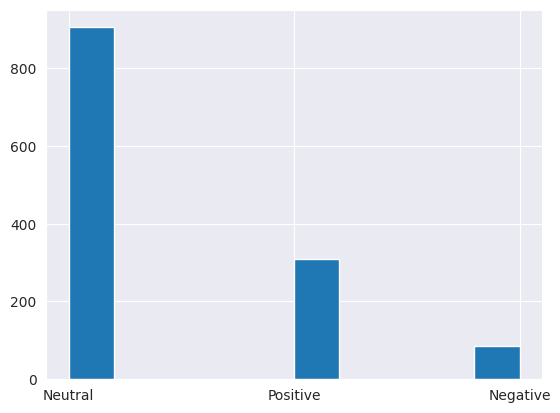

In [348]:
data_label['predicted_sentiment_class'].hist()

In [349]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**sample random**

mengambil secara acak dari daftar sample atau sampling frame yang tersedia setiap individu memiliki peluang yang sama untuk terpilih
peluang tersebut ada melakukan peluang sama ketika mempunyai data besar akan memliki peluang lebih besar untuk terpilih tetapi sebaliknya ketika mempunyai data dikit dapat peluang lebih sedikit

In [350]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_siap'], data_label['Sentiment'], 
                                                    test_size=0.1, stratify=data_label['Sentiment'], random_state=30)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create the Naive Bayes Classifier object
gnb = GaussianNB()

# Perform cross-validation
scores = cross_val_score(gnb, X_train.toarray(), y_train, cv=5)

# Print the cross-validation scores
print('Cross-validation scores:', scores)

# Fit the classifier to the training data
gnb.fit(X_train.toarray(), y_train)

# Predict the sentiment of the test data
y_pred = gnb.predict(X_test.toarray())

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Cross-validation scores: [0.53846154 0.59401709 0.63247863 0.53418803 0.54273504]
Confusion Matrix:
 [[ 1  2  2]
 [10 65 30]
 [ 0  8 12]]


In [351]:
# Convert sparse matrix to dense numpy array
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Print the scores on the training and test sets
print('Training set score: {:.4f}'.format(gnb.score(X_train_dense, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test_dense, y_test)))


Training set score: 0.8889
Test set score: 0.6000


In [352]:
accuracy = gnb.score(X_test.toarray(), y_test)
print('Accuracy:', accuracy)

Accuracy: 0.6


In [353]:
vectorizer

TfidfVectorizer()

In [354]:
nb = GaussianNB(var_smoothing=1.0) # untuk tidak overviting

In [355]:
data_label

,Nama pengguna,Ulasan_siap,Sentiment,Ulasan_clean,predicted_sentiment_class
0,Nizar Rayyan,paylater batal otomatis kadang nya ganti jatuh...,Neutral,paylater batal otomatis kadang nya ganti jatuh...,Neutral
1,Ganjar Hermadi,kembali dana otomatis berfungsisy butuh banget...,Neutral,kembali dana otomatis berfungsisy butuh banget...,Neutral
2,Fandy Komo,kesini buka lapak bagus layan komplan susah su...,Neutral,kesini buka lapak bagus layan komplan susah su...,Neutral
3,Dwi Indarti,bayar lunaspaylater transaksi apapunselalu bat...,Neutral,bayar lunaspaylater transaksi apapunselalu bat...,Neutral
4,Yuda Nugraha,update aco aplikasi menu barang favorit enggak...,Neutral,update aco aplikasi menu barang favorit enggak...,Neutral
...,...,...,...,...,...
1295,Pengguna Google,belanja ribet transfer gerai enak atm menu nya...,Neutral,belanja ribet transfer gerai enak atm menu nya...,Neutral
1296,KARMAD ZAIN,kecewa aplikasi bukalapak fitur zonk spin top ...,Positive,kecewa aplikasi bukalapak fitur zonk spin top ...,Positive
1297,Pengguna Google,saran bukalapak transaksi bukalapak bayar paka...,Neutral,saran bukalapak transaksi bukalapak bayar paka...,Neutral
1298,Pengguna Google,update tanggal april apl bl fungsi tampil menu...,Neutral,update tanggal april apl bl fungsi tampil menu...,Neutral


In [356]:
cm = confusion_matrix(y_test,y_pred)

In [357]:
print('--------------------- confusion matrix  ----------------------------')
print(confusion_matrix(y_test, y_pred))
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred))

--------------------- confusion matrix  ----------------------------
[[ 1  2  2]
 [10 65 30]
 [ 0  8 12]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

    Negative       0.09      0.20      0.13         5
     Neutral       0.87      0.62      0.72       105
    Positive       0.27      0.60      0.37        20

    accuracy                           0.60       130
   macro avg       0.41      0.47      0.41       130
weighted avg       0.75      0.60      0.65       130



In [358]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [359]:
# print classification error kesalahan klasifikasi 

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1538


In [360]:

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8462


<Axes: >

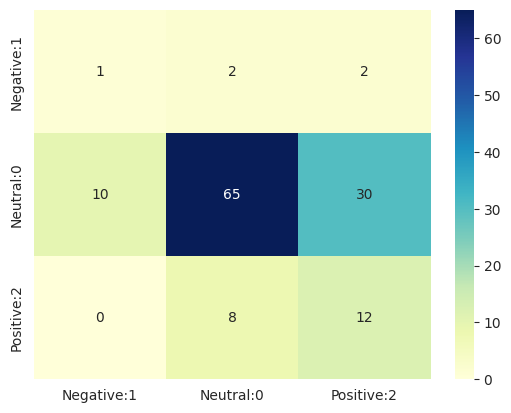

In [361]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Negative:1', 'Neutral:0', 'Positive:2'], 
                                 index=['Negative:1', 'Neutral:0', 'Positive:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [362]:
X_test

<130x3408 sparse matrix of type '<class 'numpy.float64'>'
	with 1520 stored elements in Compressed Sparse Row format>

In [363]:
X_train

<1170x3408 sparse matrix of type '<class 'numpy.float64'>'
	with 16436 stored elements in Compressed Sparse Row format>

In [364]:
y_test

786      Neutral
667      Neutral
1004    Negative
601      Neutral
1141     Neutral
          ...   
469      Neutral
521     Positive
924      Neutral
1058    Positive
1249     Neutral
Name: Sentiment, Length: 130, dtype: object

In [365]:
y_train

825     Neutral
662     Neutral
637     Neutral
1079    Neutral
907     Neutral
         ...   
725     Neutral
215     Neutral
861     Neutral
275     Neutral
1213    Neutral
Name: Sentiment, Length: 1170, dtype: object

In [366]:
print(y_train)

825     Neutral
662     Neutral
637     Neutral
1079    Neutral
907     Neutral
         ...   
725     Neutral
215     Neutral
861     Neutral
275     Neutral
1213    Neutral
Name: Sentiment, Length: 1170, dtype: object


<Axes: >

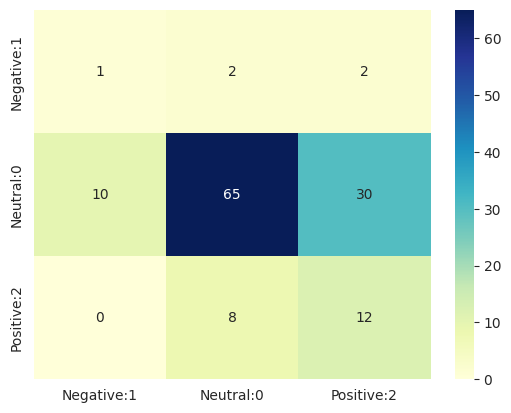

In [367]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Negative:1', 'Neutral:0', 'Positive:2'], 
                                 index=['Negative:1', 'Neutral:0', 'Positive:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [368]:
cm = confusion_matrix(y_test,y_pred)

In [369]:

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 1  2  2]
 [10 65 30]
 [ 0  8 12]]


In [370]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


In [371]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [372]:
# Regresi Logistik
logreg = LogisticRegression()
# SVM
svm = SVC(probability=True)

In [373]:
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)


SVC(probability=True)

In [374]:
y_pred1_logreg = logreg.predict(X_test)
y_pred1_svm = svm.predict(X_test)

In [375]:
print('---------------  Regresi Logistik  -------------------')
print(classification_report(y_test, y_pred1_logreg))
print('--------------------- SVM ----------------------------')
print(classification_report(y_test, y_pred1_svm))

---------------  Regresi Logistik  -------------------
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         5
     Neutral       0.85      1.00      0.92       105
    Positive       1.00      0.35      0.52        20

    accuracy                           0.86       130
   macro avg       0.62      0.45      0.48       130
weighted avg       0.84      0.86      0.82       130

--------------------- SVM ----------------------------
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         5
     Neutral       0.85      1.00      0.92       105
    Positive       1.00      0.30      0.46        20

    accuracy                           0.85       130
   macro avg       0.62      0.43      0.46       130
weighted avg       0.84      0.85      0.81       130



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif